In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics._regression import root_mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm


   Gestosc  Pct.BF  Wiek    Waga  Wzrost  Szyja  Klatka  Brzuch      Talia  \
0   1.0708    12.3    23  154.25   67.75   36.2    93.1    85.2  33.543307   
1   1.0853     6.1    22  173.25   72.25   38.5    93.6    83.0  32.677165   
2   1.0414    25.3    22  154.00   66.25   34.0    95.8    87.9  34.606299   
3   1.0751    10.4    26  184.75   72.25   37.4   101.8    86.4  34.015748   
4   1.0340    28.7    24  184.25   71.25   34.4    97.3   100.0  39.370079   

   Biodro   Udo  Kolano  Kostka  Biceps  Przedramie  Nadgarstek  
0    94.5  59.0    37.3    21.9    32.0        27.4        17.1  
1    98.7  58.7    37.3    23.4    30.5        28.9        18.2  
2    99.2  59.6    38.9    24.0    28.8        25.2        16.6  
3   101.2  60.1    37.3    22.8    32.4        29.4        18.2  
4   101.9  63.2    42.2    24.0    32.2        27.7        17.7  
                            OLS Regression Results                            
Dep. Variable:                 Pct.BF   R-squared:      

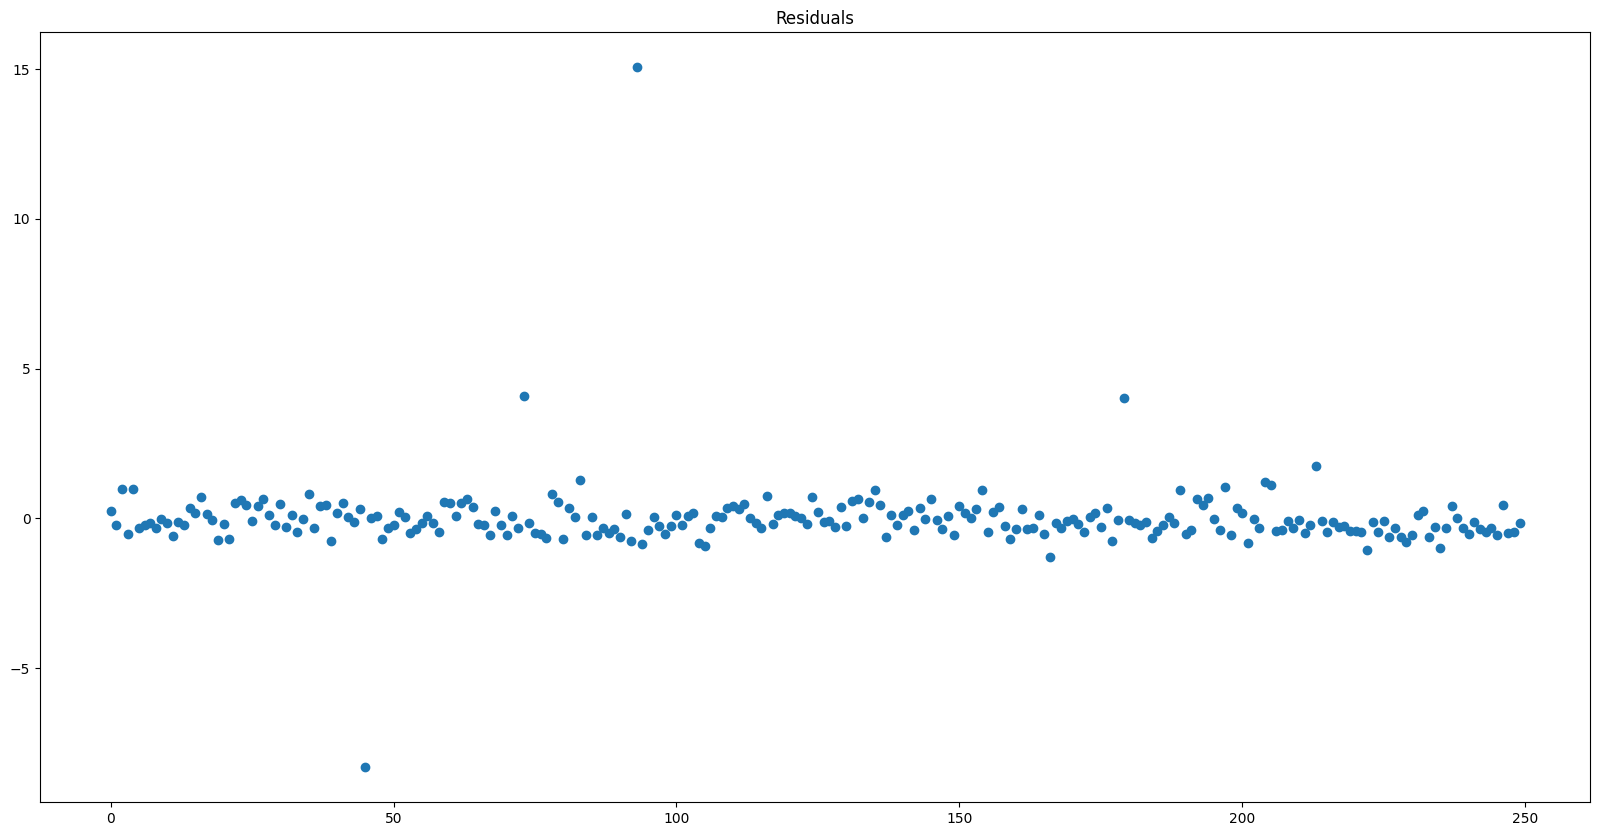

     Gestosc  Pct.BF  Wiek    Waga  Wzrost  Szyja  Klatka  Brzuch      Talia  \
0     1.0708    12.3    23  154.25   67.75   36.2    93.1    85.2  33.543307   
1     1.0853     6.1    22  173.25   72.25   38.5    93.6    83.0  32.677165   
2     1.0414    25.3    22  154.00   66.25   34.0    95.8    87.9  34.606299   
3     1.0751    10.4    26  184.75   72.25   37.4   101.8    86.4  34.015748   
4     1.0340    28.7    24  184.25   71.25   34.4    97.3   100.0  39.370079   
..       ...     ...   ...     ...     ...    ...     ...     ...        ...   
245   1.0736    11.0    70  134.25   67.00   34.9    89.2    83.6  32.913386   
246   1.0236    33.6    72  201.00   69.75   40.9   108.5   105.0  41.338583   
247   1.0328    29.3    72  186.75   66.00   38.9   111.1   111.5  43.897638   
248   1.0399    26.0    72  190.75   70.50   38.9   108.3   101.3  39.881890   
249   1.0271    31.9    74  207.50   70.00   40.8   112.4   108.5  42.716535   

     Biodro   Udo  Kolano  Kostka  Bice

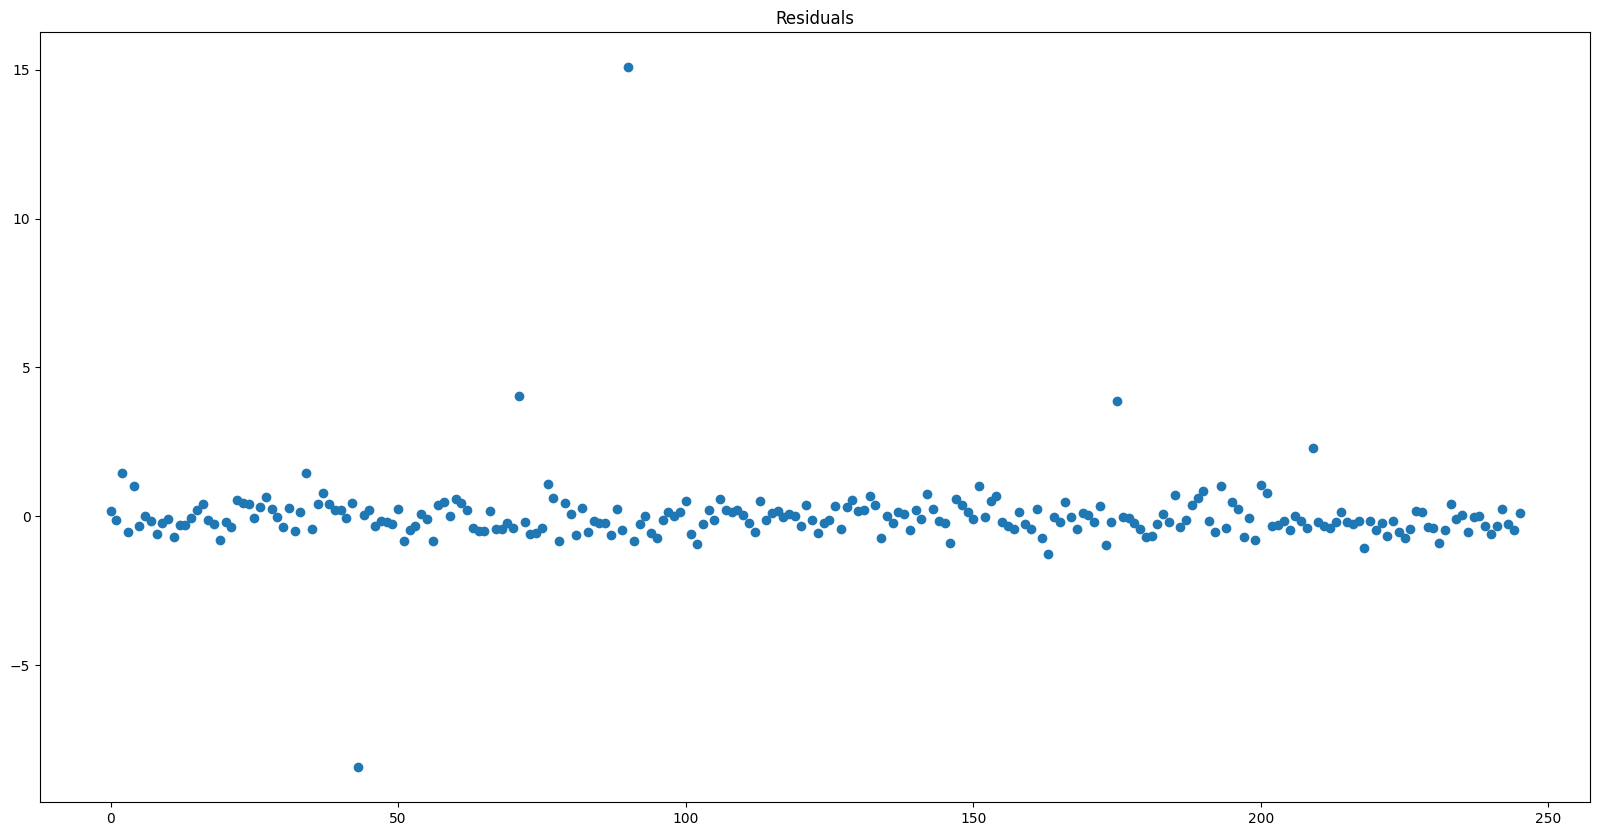

                            OLS Regression Results                            
Dep. Variable:                 Pct.BF   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     2556.
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          5.45e-196
Time:                        18:49:57   Log-Likelihood:                -404.33
No. Observations:                 246   AIC:                             818.7
Df Residuals:                     241   BIC:                             836.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        456.6679      6.599     69.207      0.0

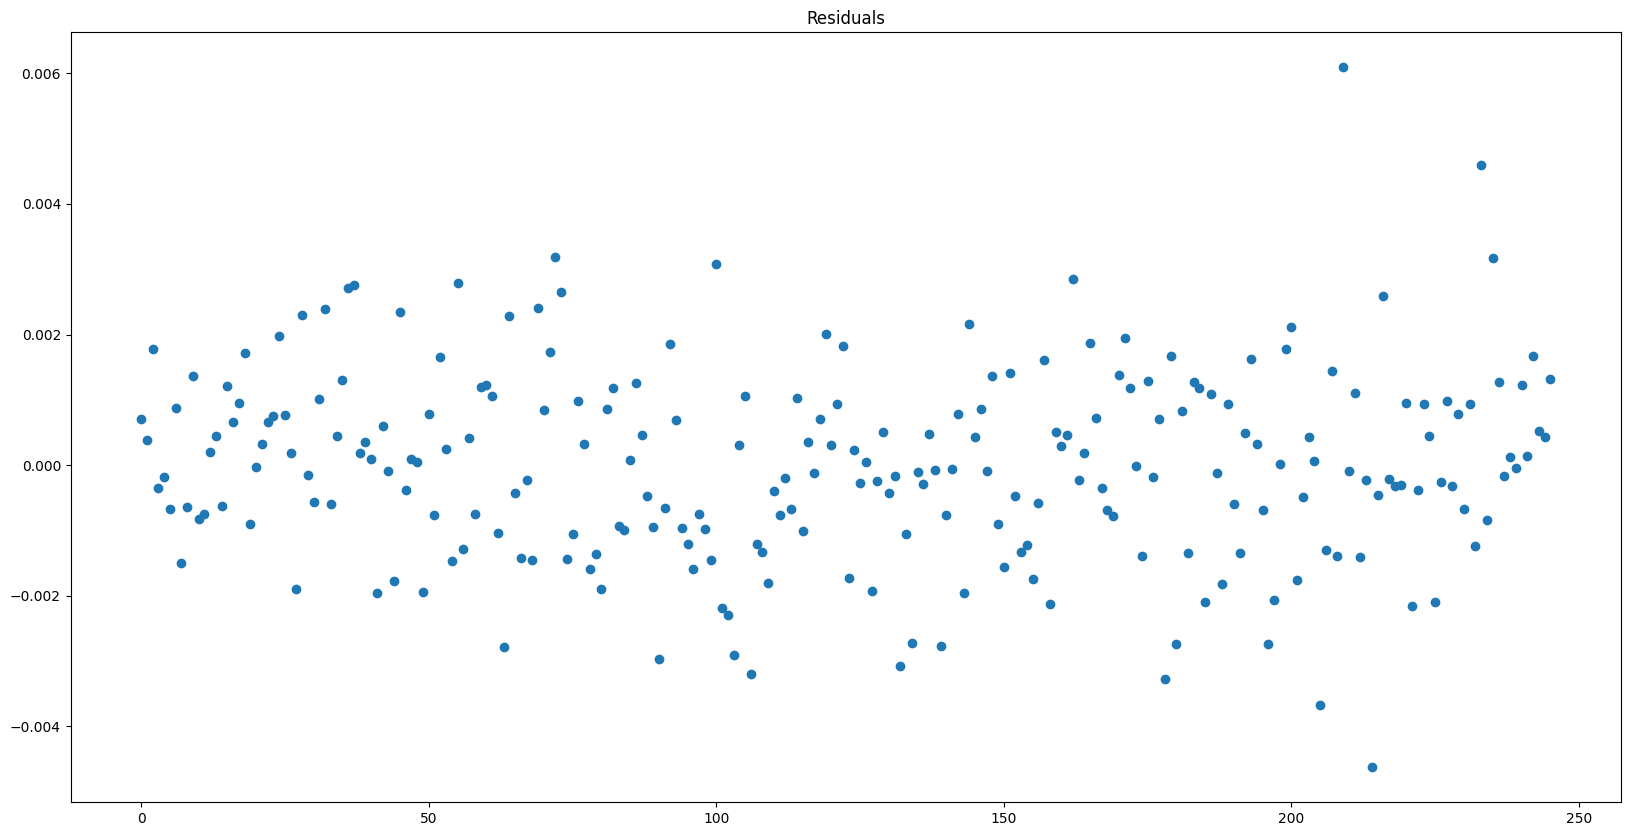

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     415.1
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          6.30e-116
Time:                        18:49:57   Log-Likelihood:                 1254.2
No. Observations:                 246   AIC:                            -2496.
Df Residuals:                     240   BIC:                            -2475.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0142      0.002     -7.755      0.0

In [138]:
# Wczytaj dane
data_set_lab1_2 = pd.read_csv("Dane_lab1_2.csv", sep=";")

print(data_set_lab1_2.head())

# Konwersja do NumPy
data_array = np.array(data_set_lab1_2)

# Alternatywnie, jako DataFrame Pandas (lepsze do manipulacji i analizy)
data_frame = pd.DataFrame(data_set_lab1_2)
# model liniowy wielu zmiennych a1*x1 + a2*x2 + ... + aN*xN + b
# zmienna zależna to Pct.BF
X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Wzrost', 'Szyja', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano','Kostka', 'Biceps', 'Przedramie', 'Nadgarstek']])
Y=data_frame['Pct.BF']
model = sm.OLS(Y, X).fit()

print(model.summary())
# wykresy
plt.figure(figsize=(20, 10))
plt.plot(model.resid, 'o')
plt.title('Residuals')
plt.show()

print(data_frame)
#
# # usun zmienna najmniej istotna
# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Wzrost', 'Szyja', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano','Kostka', 'Biceps', 'Przedramie']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# print(model.summary())
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
#
#
# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Wzrost', 'Szyja', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano','Kostka', 'Biceps', 'Przedramie']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# print(model.summary())
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# #test grubbsa
# def test_grubbs(residuals):
#     mean_residual = np.mean(residuals)
#     std_residual = np.std(residuals)
#     max_residual = np.max(residuals)
#     n = len(residuals)
#     G = (max_residual - mean_residual) / std_residual
#     t = 0.95
#     critical_value = (n - 1) / np.sqrt(n) * np.sqrt(np.square(t) / (n - 2 + np.square(t)))
#     if G > critical_value:
#         return True
#     else:
#         return False

# usun linie 32 , 41, 85, 174
data_frame = data_frame.drop([30, 39, 83, 172])
# reindex
data_frame = data_frame.reset_index(drop=True)
print(data_frame)

# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Wzrost', 'Szyja', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano','Kostka', 'Biceps', 'Przedramie', 'Nadgarstek']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())
#
#
# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Wzrost', 'Szyja', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano','Kostka', 'Biceps', 'Przedramie']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())
#
#
# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Wzrost', 'Szyja', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano','Kostka', 'Biceps']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())


# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Szyja', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano','Kostka', 'Biceps']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())

# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano','Kostka', 'Biceps']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())

# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo','Kostka', 'Biceps']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())

# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Klatka', 'Talia', 'Biodro', 'Udo','Kostka', 'Biceps']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())


# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Klatka', 'Talia', 'Biodro','Kostka', 'Biceps']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())


# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Klatka', 'Talia', 'Kostka', 'Biceps']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())
#
#
# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga', 'Klatka' , 'Kostka', 'Biceps']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())
#
# X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga' , 'Kostka', 'Biceps']])
# Y=data_frame['Pct.BF']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())

X=sm.add_constant(data_frame[['Gestosc', 'Wiek', 'Waga' , 'Kostka']])
Y=data_frame['Pct.BF']
model = sm.OLS(Y, X).fit()

# wykresy
plt.figure(figsize=(20, 10))
plt.plot(model.resid, 'o')
plt.title('Residuals')
plt.show()

print(model.summary())


bmi = data_frame['Waga'] / np.square(data_frame['Wzrost'])
# dodaj kolumne BMI
data_frame['BMI'] = bmi

# X=sm.add_constant(data_frame[['Wiek', 'Szyja', 'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano', 'Kostka', 'Biceps', 'Przedramie', 'Nadgarstek']])
# Y=data_frame['BMI']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())

#
# X=sm.add_constant(data_frame[['Wiek',  'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano', 'Kostka', 'Biceps', 'Przedramie', 'Nadgarstek']])
# Y=data_frame['BMI']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())

#Nadgarstek

# X=sm.add_constant(data_frame[['Wiek',  'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano', 'Kostka', 'Biceps', 'Przedramie']])
# Y=data_frame['BMI']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())
#

# Kostka
# X=sm.add_constant(data_frame[['Wiek',  'Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano', 'Biceps', 'Przedramie']])
# Y=data_frame['BMI']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
#
# print(model.summary())

# # Wiek
# X=sm.add_constant(data_frame[['Klatka', 'Brzuch', 'Talia', 'Biodro', 'Udo', 'Kolano', 'Biceps', 'Przedramie']])
# Y=data_frame['BMI']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
# print(model.summary())

#
# # Biodro
# X=sm.add_constant(data_frame[['Klatka', 'Brzuch', 'Talia', 'Udo', 'Kolano', 'Biceps', 'Przedramie']])
# Y=data_frame['BMI']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
# print(model.summary())

# brzuch
# X=sm.add_constant(data_frame[['Klatka', 'Talia', 'Udo', 'Kolano', 'Biceps', 'Przedramie']])
# Y=data_frame['BMI']
# model = sm.OLS(Y, X).fit()
#
# # wykresy
# plt.figure(figsize=(20, 10))
# plt.plot(model.resid, 'o')
# plt.title('Residuals')
# plt.show()
# print(model.summary())


# biceps
X=sm.add_constant(data_frame[['Klatka', 'Talia', 'Udo', 'Kolano', 'Przedramie']])
Y=data_frame['BMI']
model = sm.OLS(Y, X).fit()

# wykresy
plt.figure(figsize=(20, 10))
plt.plot(model.resid, 'o')
plt.title('Residuals')
plt.show()
print(model.summary())
